In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Exploring data from Asy_D03 (Numbers waiting longer than 6 months)

In [51]:
csv_file_path = 'processed-data\Data - Asy_D03_output.csv'

waiting_df = pd.read_csv(csv_file_path)

print(waiting_df.columns)

Index(['Date (as at…)', 'Nationality', 'Region', 'Applicant type',
       'Application stage', 'Duration', 'Applications'],
      dtype='object')


'Date (as at...)' is quarterly data
Duration is either less than 6 months or greater than 6 months
Applications is the number of applications in each category 

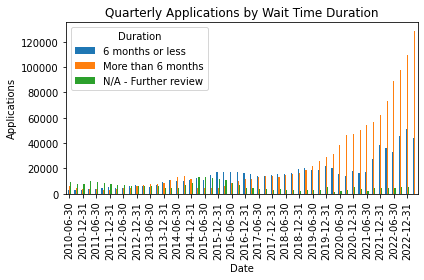

In [52]:
waiting_df['Date (as at…)'] = pd.to_datetime(waiting_df['Date (as at…)'], format='%d %b %Y')

grouped_df = waiting_df.groupby(['Date (as at…)', 'Duration'])['Applications'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Date (as at…)', columns='Duration', values='Applications')

pivot_df.plot(kind='bar')
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Applications')
plt.title('Quarterly Applications by Wait Time Duration')

x_ticks_frequency = 20
x_tick_positions = range(0, len(pivot_df.index), len(pivot_df.index) // x_ticks_frequency)
x_tick_labels = pivot_df.index[x_tick_positions].strftime('%Y-%m-%d')
plt.xticks(ticks=x_tick_positions, labels=x_tick_labels)

plt.tight_layout() 
plt.legend(title='Duration')
plt.show()


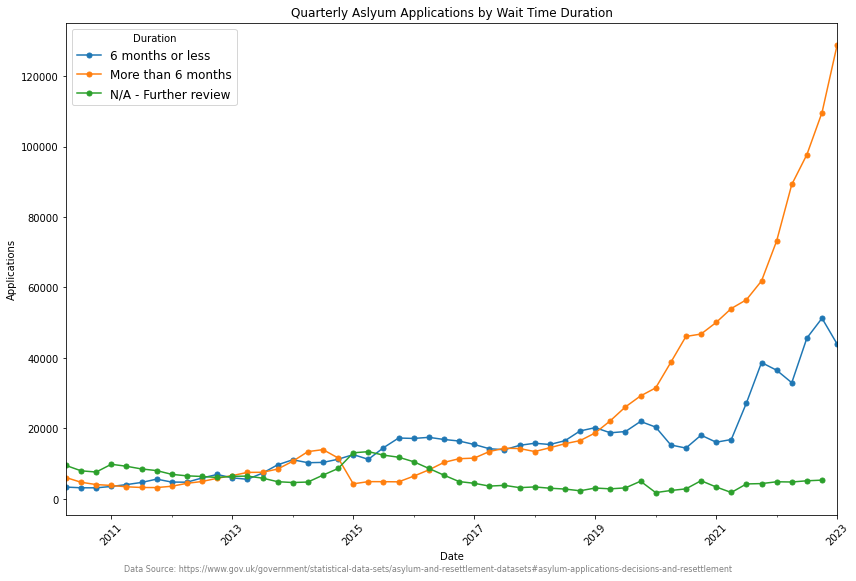

In [80]:
waiting_df['Date (as at…)'] = pd.to_datetime(waiting_df['Date (as at…)'], format='%d %b %Y')

grouped_df = waiting_df.groupby(['Date (as at…)', 'Duration'])['Applications'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Date (as at…)', columns='Duration', values='Applications')

fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

pivot_df.plot(kind='line', marker='o', markersize=5, ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Applications')
ax.set_title('Quarterly Aslyum Applications by Wait Time Duration')

plt.xticks(rotation=45)  

plt.tight_layout() 
plt.legend(title='Duration', fontsize=12)

# Add the footer text
footer_text = "Data Source: https://www.gov.uk/government/statistical-data-sets/asylum-and-resettlement-datasets#asylum-applications-decisions-and-resettlement"
plt.figtext(0.5, 0.00, footer_text, ha='center', fontsize=8, color='gray')
plt.savefig('Aslyum Applications by wait time duration.png', dpi=300, bbox_inches='tight')
plt.show()

Number of Asylum Applications

In [79]:
csv_file_path = 'processed-data\Data - Asy_D01_output.csv'

aslyum_applications_df = pd.read_csv(csv_file_path)

print(aslyum_applications_df.columns)

Index(['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex',
       'Applicant type', 'UASC', 'Location of application', 'Applications'],
      dtype='object')
